Tests:
Bad sorted: [1, 5, 7, 8, 9, 10]...
Bad correct: True
Quick Random sorted: [1, 5, 7, 8, 9, 10]...
Quick Random correct: True
Quick Median sorted: [1, 5, 7, 8, 9, 10]...
Quick Median correct: True
Merge sorted: [1, 5, 7, 8, 9, 10]...
Merge correct: True
Heap sorted: [1, 5, 7, 8, 9, 10]...
Heap correct: True

Additional tests on Merge (example):
Empty sorted: []...
True
Single sorted: [42]...
True
Sorted sorted: [1, 2, 3]...
True
Reverse sorted: [1, 2, 3, 4, 5]...
True

Performance table:
| Size | Bad | Improved quick | Merge | Heap |
|------|-----|----------------|-------|------|
| 100 | 0.000716 | 0.000199 | 0.000266 | 0.000268 |
| 1000 | 0.087940 | 0.002336 | 0.003186 | 0.004156 |
| 5000 | 2.192289 | 0.013522 | 0.020958 | 0.033653 |
| 10000 | 9.105126 | 0.025473 | 0.045604 | 0.063086 |


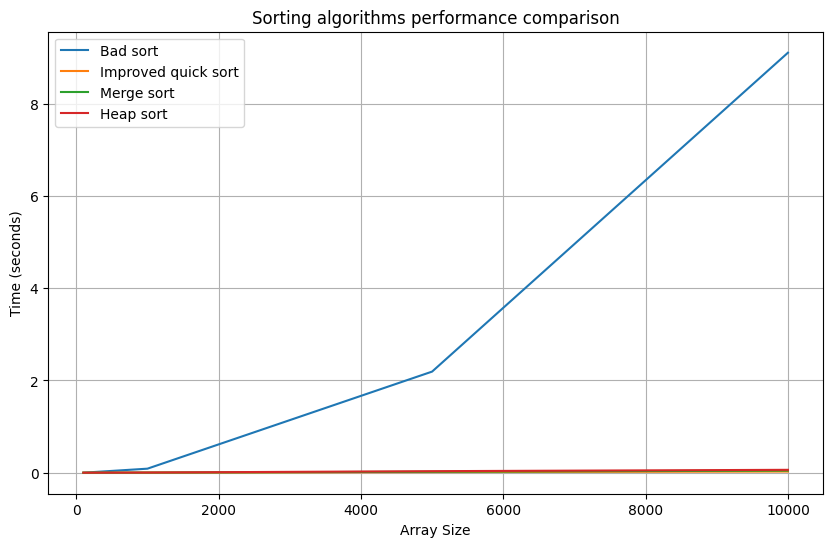

In [2]:
import timeit
import random
import matplotlib.pyplot as plt
import numpy as np




def bad_sort(arr):
    n = len(arr)
    for i in range(n):
        for j in range(0, n-i-1):
            if arr[j] > arr[j+1]:
                temp = arr[j]
                arr[j] = arr[j+1]
                arr[j+1] = temp



#quick sort with random pivot
def quick_sort_random(arr):
    if len(arr) <= 1:
        return arr
    pivot = random.choice(arr)
    less = [x for x in arr if x < pivot]
    equal = [x for x in arr if x == pivot]
    greater = [x for x in arr if x > pivot]
    return quick_sort_random(less) + equal + quick_sort_random(greater)

#quick sort with average pivot(median of first,middle andlast )
def quick_sort_median(arr):
    if len(arr) <= 1:
        return arr
    #median of three
    first = arr[0]
    last = arr[-1]
    mid = arr[len(arr)//2]
    pivot = sorted([first, mid, last])[1] #median
    less = [x for x in arr if x < pivot]
    equal = [x for x in arr if x == pivot]
    greater = [x for x in arr if x > pivot]
    return quick_sort_median(less) + equal + quick_sort_median(greater)

#merge sort
def merge_sort(arr):
    if len(arr) > 1:
        mid = len(arr) // 2
        left = merge_sort(arr[:mid])
        right = merge_sort(arr[mid:])
        i = j = 0
        merged = []
        while i < len(left) and j < len(right):
            if left[i] < right[j]:
                merged.append(left[i])
                i += 1
            else:
                merged.append(right[j])
                j += 1
        merged.extend(left[i:])
        merged.extend(right[j:])
        return merged
    return arr

#heap sort
def heapify(arr, n, i):
    largest = i
    l = 2 * i + 1
    r = 2 * i + 2
    if l < n and arr[l] > arr[largest]:
        largest = l
    if r < n and arr[r] > arr[largest]:
        largest = r
    if largest != i:
        arr[i], arr[largest] = arr[largest], arr[i]
        heapify(arr, n, largest)

def heap_sort(arr):
    n = len(arr)
    for i in range(n//2 - 1, -1, -1):
        heapify(arr, n, i)
    for i in range(n-1, 0, -1):
        arr[i], arr[0] = arr[0], arr[i]
        heapify(arr, i, 0)
    return arr

#lets test function to check if works
def test_sort(sort_func, arr, name):
    arr_copy = arr.copy()
    result = sort_func(arr_copy)
    if result is None:
        sorted_arr = arr_copy
    else:
        sorted_arr = result
    print(f"{name} sorted: {sorted_arr[:10]}...")
    return sorted_arr == sorted(arr)

#runtest
test_arr = [10, 7, 8, 9, 1, 5]
print("Tests:")
print("Bad correct:", test_sort(bad_sort, test_arr, "Bad"))
print("Quick Random correct:", test_sort(quick_sort_random, test_arr, "Quick Random"))
print("Quick Median correct:", test_sort(quick_sort_median, test_arr, "Quick Median"))
print("Merge correct:", test_sort(merge_sort, test_arr, "Merge"))
print("Heap correct:", test_sort(heap_sort, test_arr, "Heap"))

#more test empty,single,sorted,reverse
print("\nAdditional tests on Merge (example):")
print(test_sort(merge_sort, [], "Empty"))
print(test_sort(merge_sort, [42], "Single"))
print(test_sort(merge_sort, [1,2,3], "Sorted"))
print(test_sort(merge_sort, [5,4,3,2,1], "Reverse"))



#generate random datasets for comparison


sizes = [100, 1000, 5000, 10000]
datasets = {size: [random.randint(0, 10000) for _ in range(size)] for size in sizes}

#timing the sorts(by using improved quick as competitor)
times = {'bad': [], 'quick_median': [], 'merge': [], 'heap': []}

for size in sizes:
    data = datasets[size]

    t_bad = timeit.timeit(lambda: bad_sort(data.copy()), number=1)
    times['bad'].append(t_bad)

    t_quick = timeit.timeit(lambda: quick_sort_median(data.copy()), number=1)
    times['quick_median'].append(t_quick)

    t_merge = timeit.timeit(lambda: merge_sort(data.copy()), number=1)
    times['merge'].append(t_merge)

    t_heap = timeit.timeit(lambda: heap_sort(data.copy()), number=1)
    times['heap'].append(t_heap)






# Print table for report
print("\nPerformance table:")
print("| Size | Bad | Improved quick | Merge | Heap |")
print("|------|-----|----------------|-------|------|")
for i, size in enumerate(sizes):
    print(f"| {size} | {times['bad'][i]:.6f} | {times['quick_median'][i]:.6f} | {times['merge'][i]:.6f} | {times['heap'][i]:.6f} |")

# Plot the results
plt.figure(figsize=(10,6))
plt.plot(sizes, times['bad'], label='Bad sort')
plt.plot(sizes, times['quick_median'], label='Improved quick sort')
plt.plot(sizes, times['merge'], label='Merge sort')
plt.plot(sizes, times['heap'], label='Heap sort')
plt.xlabel('Array Size')
plt.ylabel('Time (seconds)')
plt.title('Sorting algorithms performance comparison')
plt.legend()
plt.grid(True)
plt.show()